## 4.9 Questions Part 2

## Importing Libraries

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Importing Dataframes

In [2]:
#Pathway to the Dataframes
path = r'C:\Users\Dallas\Desktop\Data Analyst - Projects\Data Immersion\Data Immersion A4\04-2023 Instacart Basket Analysis'

In [3]:
#Importing orders_products_merged_grouping.pkl dataframe
df_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_ords_prods_merged.pkl'))

### Question 1. Create new notebook and import necessary analysis and visualization libraries and most up-to-date project

In [6]:
#Checking Imported Dataframe
df_cust_merge.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_freq_flag,First Name,Last Name,Gender,State,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [7]:
#Checking the size
df_cust_merge.shape

(32404859, 33)

In [8]:
#Checking the column titles
df_cust_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   order_day_of_week       int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  average_price           float64 
 21  spendi

### Question 2. Follow instructions in the exercise to reat a bar chart, histogram, scatterplot and a line chart, using sample subset for line chart

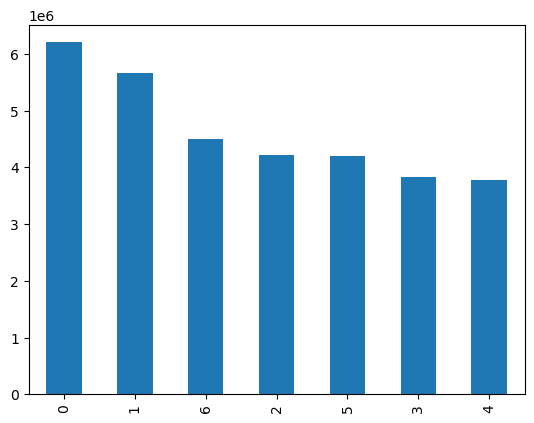

In [18]:
#Plotting bar chart for order_day_of_week column
bar_1 = df_cust_merge['order_day_of_week'].value_counts().plot.bar()

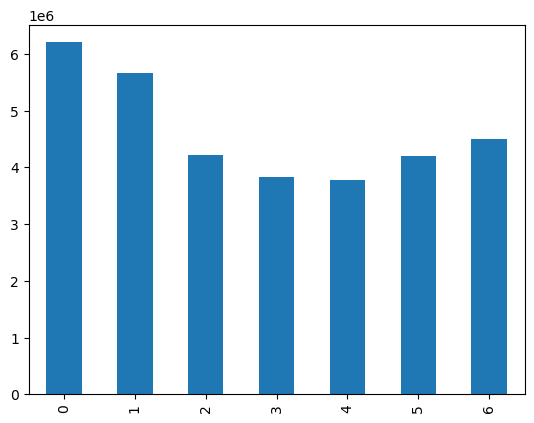

In [19]:
#Sorting the bar chart according to their index order
bar_2 = df_cust_merge['order_day_of_week'].value_counts().sort_index().plot.bar()

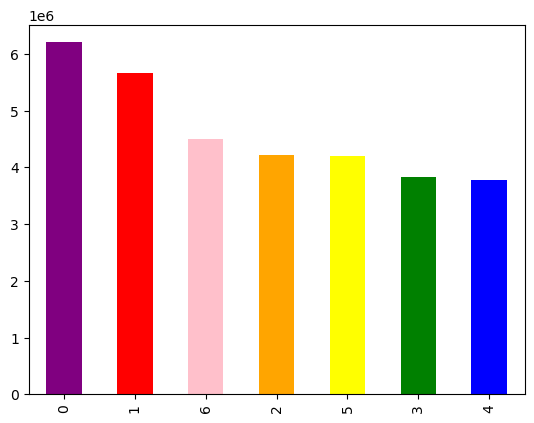

In [53]:
#Changing the colors of the bar chart
bar_3 = df_cust_merge['order_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

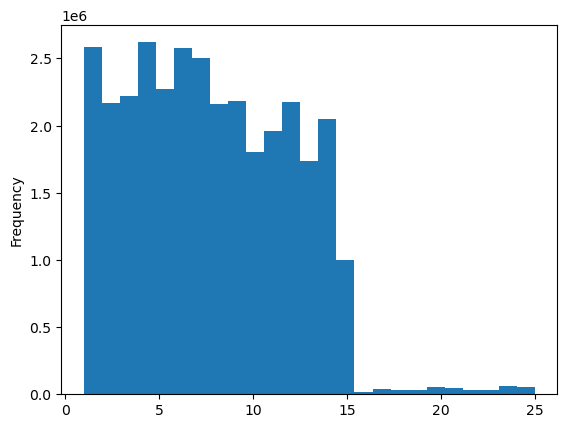

In [17]:
#Histogram for prices column with 25 bins
hist_1 = df_cust_merge['prices'].plot.hist(bins = 25)

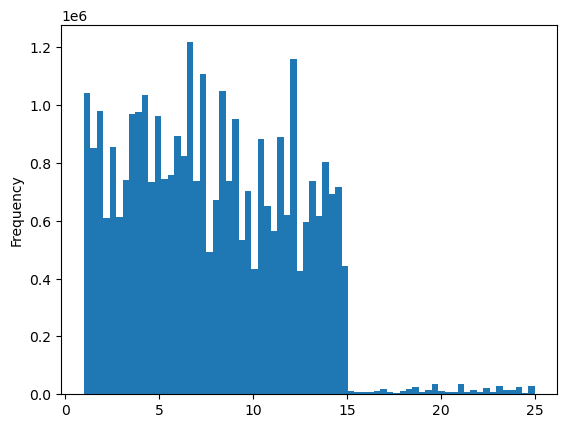

In [16]:
#Histogram for prices column with 70 bins
hist_2 = df_cust_merge['prices'].plot.hist(bins = 70)

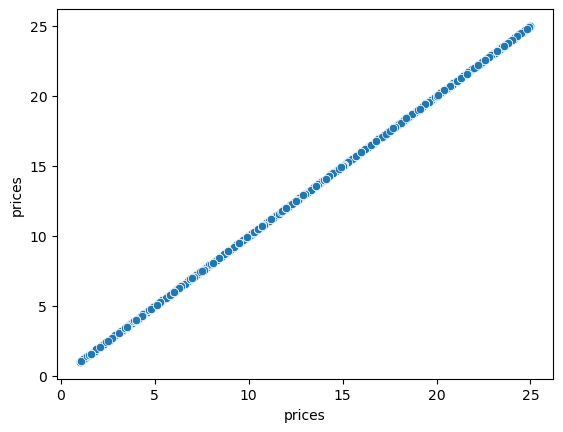

In [66]:
#Scatterplot of the prices column
scat = sns.scatterplot(x = 'prices', y = 'prices',data = df_cust_merge)

In [24]:
#Creating a 70/30 Sampling of the dataframe 
np.random.seed(4)
dev = np.random.rand(len(df_cust_merge)) <= 0.7

In [25]:
#List of randomized True and False values
dev

array([False,  True, False, ...,  True,  True,  True])

In [26]:
#Testing the size of the array
dev.shape

(32404859,)

In [27]:
#Sample Example of the function
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [29]:
#Store the dataframe into two samples, 70% in the big and 30% in the small
big = df_cust_merge[dev]
small = df_cust_merge[~dev]

In [30]:
#Length of the sum of the two sample spaces
len(big) + len(small)

32404859

In [31]:
#Creating another dataframe to include only order_day_of_week ad prices from the small sample space
df_2 = small[['order_day_of_week','prices']]

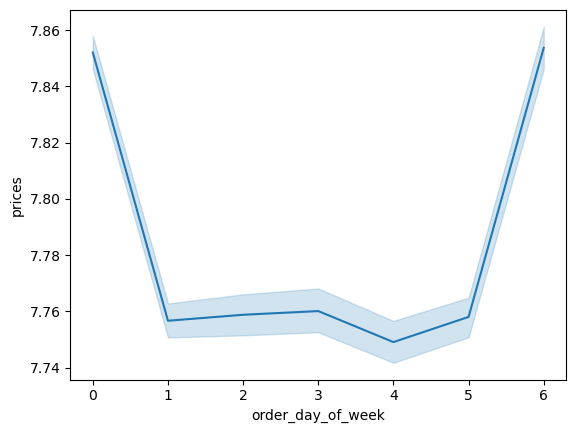

In [32]:
#Creating a line graph using the dataframe made of the small sample space
line = sns.lineplot(data = df_2, x = 'order_day_of_week', y = 'prices')

### Question 3. Provide Instacart senior stakeholders with descriptie findings about sales.  Create Histogram of the "order_hour_of_day" column

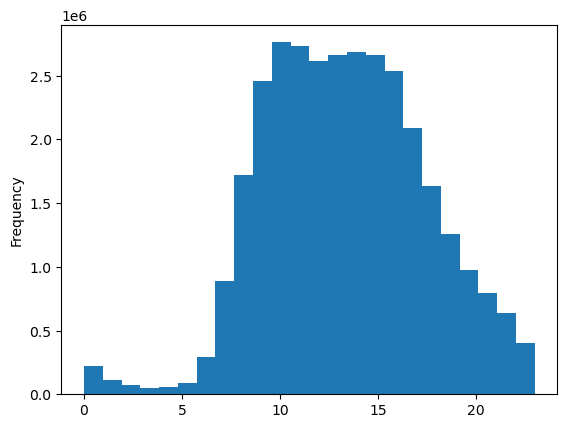

In [36]:
#Histogram for order_hour_of_day column with 24 bins because there are only 24 hours in a day
hist_3 = df_cust_merge['order_hour_of_day'].plot.hist(bins = 24)

### Observations: Histogram demostrates the frequency of shoppers throughout the day.  Lowest frequency is between hours 0-6.  Frequency begins to pickup between hours 7-9.  Peak hours are between 10-16.  Frequency drops off after hour 16 relatively consistently until hour 23.

### Question 4. The marketing team is curios about the distribution of orders among customers in terms of loyalty.  Create a bar chart from the "loyalty_flag" column

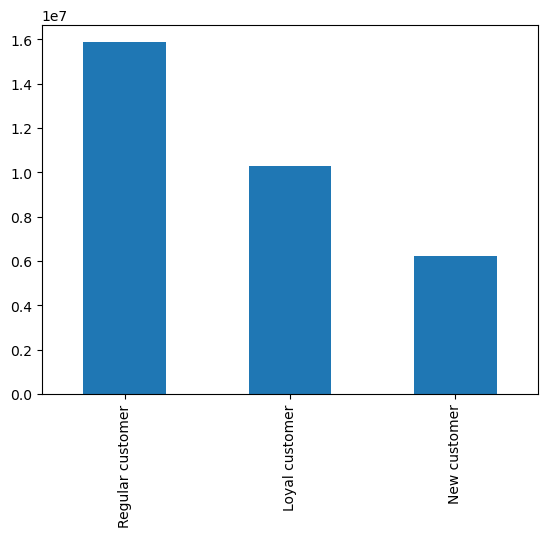

In [52]:
#Plotting bar chart to measure loyalty
bar_4 = df_cust_merge['loyalty_flag'].value_counts().plot.bar()

### Question 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [38]:
#Line Chart to determine if there's a difference in expenditure between hour of day and prices
df_line = small[['order_hour_of_day', 'prices']]

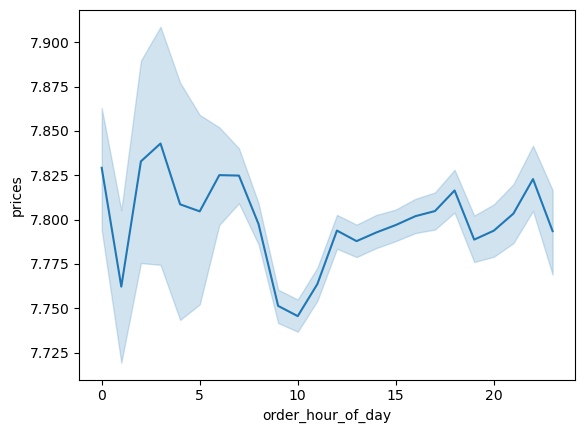

In [39]:
#Creating the line chart
line_2 = sns.lineplot(data = df_line, x = 'order_hour_of_day', y = 'prices')

### Question 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [41]:
#Line Chart to determine if there's a connection between age and number of dependants
df_line_2 = small[['Age', 'n_dependants']]

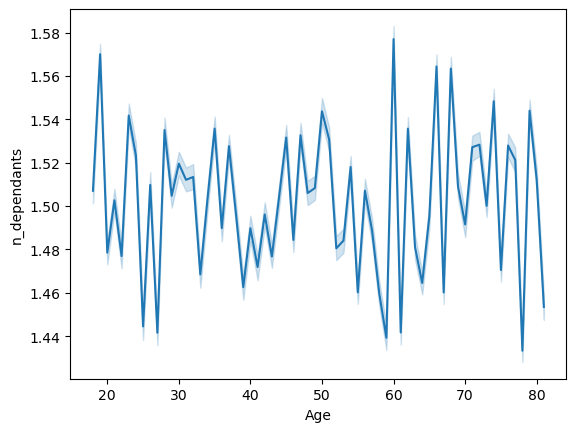

In [42]:
#Creating the line chart
line_3 = sns.lineplot(data = df_line_2, x = 'Age', y = 'n_dependants')

### Question 7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function

### Observations: There doesn't seem to be any real connection between age and number of dependants.  There are quite a few interesting observations to make though.  The 20's age group seems to quite erratic which makes sense because this is the time people tend to decide whether to have kids or not.  Same for the 30's group.  Age 18-19 seems to have quite a large spike as well.  The 40's has an upward trend which would suggest possibly parents kids are still dependants because they are in post-secondary, which may determine what they shop for.  The large spike in the age 60 spot may be a clue that some kids are now taking care of their parents in retirement, which could determine shoping habits.  All-in-all, there really doesn't seem to be any real trends to discern here.

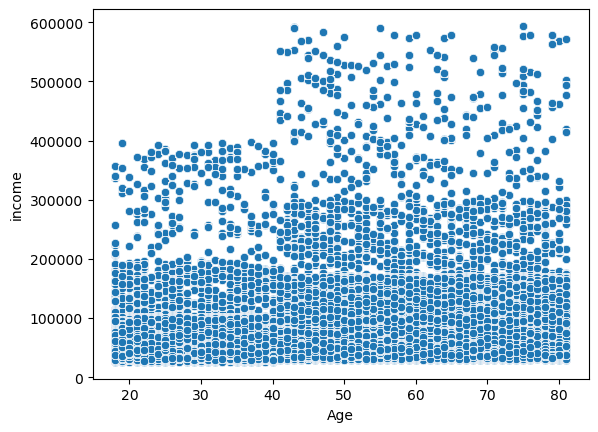

In [65]:
#Scatterplot to determine if there is a connection between age and spending power
scat_2 = sns.scatterplot(x = 'Age', y = 'income',data = df_cust_merge)

### Observations: The vast majority across all age groups tend to be making under 200K.  Around age 40+, more of the population is making up to 300K.  Nobody before age 40 is making above 400K and there does seem to be some generoud portion ages 40+ making all the way to up to 600K.  The real observation here, is that income tends to generally increase around age 40 which makes sense for people in that life stage.  Some jump from 400K to 600K or from 200K to 300K, but either way, this is where the income change takes place generally.

### Question 8. Export your visualizations as “.png” files in your relevant project folder

In [69]:
#Export bar chart for order_day_of_week column
bar_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

In [70]:
#Export bar chart according to their index order
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow_index.png'))

In [71]:
#Export bar chart for order_day_of_week with colors changed
bar_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow_color.png'))

In [72]:
#Export Histogram for prices column with 25 bins
hist_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_25.png'))

In [73]:
#Export Histogram for prices column with 70 bins
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_70.png'))

In [67]:
#Export Scatterplot of the prices column
scat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_prices.png'))

In [74]:
#Export line chart of prices vs order_day_of_week
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_dow.png'))

In [75]:
#Export Histogram for order_hour_of_day column 
hist_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hod.png'))

In [76]:
#Export bar chart to measure loyalty frequency
bar_4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyal.png'))

In [77]:
#Export Line Chart to determine if there's a difference in expenditure between hour of day and prices
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_hod.png'))

In [78]:
#Export Line Chart to determine if there's a connection between age and number of dependants
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dep.png'))

In [68]:
#Export Scatterplot to determine if there is a connection between age and spending power
scat_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_age_income.png'))

### Question 9. Save the notebook 

### Question 10. Submit both notebooks for part 1 and 2 